## Connect to Datasets

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Descriptive Statistics

In [ ]:
# EU ETS
import pandas as pd

file_path = '/content/drive/MyDrive/Thesis Dataset/Carbon Price/EU ETS_200601-202312_EUR_Filled.csv'

try:
    data = pd.read_csv(file_path, encoding='utf-8', delimiter=',')
except UnicodeError:
    try:
        data = pd.read_csv(file_path, encoding='ISO-8859-1', delimiter=',')
    except Exception as e:
        print("Error reading the file:", e)
        raise

stats = data['Close (EUR)'].describe()

stats['count'] = stats['count'].astype(int)
cv = stats['std'] / stats['mean']

summary_stats = {
    'Observations (Obs.)': stats['count'],
    'Mean (M)': stats['mean'],
    'Standard Deviation (SD)': stats['std'],
    'Coefficient of Variation (CV)': cv,
    'Median (Med)': stats['50%'],
    'Maximum (Max)': stats['max'],
    'Minimum (Min)': stats['min'],
}

summary_stats

{'Observations (Obs.)': 6574.0,
 'Mean (M)': 22.73382415576513,
 'Standard Deviation (SD)': 25.456895472640273,
 'Coefficient of Variation (CV)': 1.119780609642157,
 'Median (Med)': 13.81,
 'Maximum (Max)': 105.14,
 'Minimum (Min)': 0.01}

In [ ]:
# China ETS
import pandas as pd

file_path = '/content/drive/MyDrive/論文測試/前三章用/Carbon Price/China ETS_2021-2023.xlsx'
data = pd.read_excel(file_path)

# 計算描述性統計
obs = data['Close'].count()  # 觀測值的數量
mean = data['Close'].mean()  # 平均值
std_dev = data['Close'].std()  # 標準差
cv = std_dev / mean * 100  # 變異係數
median = data['Close'].median()  # 中位數
min_value = data['Close'].min()  # 最小值
max_value = data['Close'].max()  # 最大值

descriptive_stats = {
    'Observations (Obs.)': obs,
    'Mean (M)': mean,
    'Standard Deviation (SD)': std_dev,
    'Coefficient of Variation (CV)': cv,
    'Median (Med)': median,
    'Range': f'{min_value} - {max_value}'
}

descriptive_stats

{'Observations (Obs.)': 483,
 'Mean (M)': 54.987060041407865,
 'Standard Deviation (SD)': 5.340056495197988,
 'Coefficient of Variation (CV)': 9.711478466345849,
 'Median (Med)': 57.06,
 'Range': '41.46 - 61.38'}

## Create Six Markets' Visualization
*   EU: 2005/01/01
*   New Zealand: 2010/05/14
*   California: 2013/01/01
*   South Korea: 2015/01/12
*   UK: 2021/05/19
*   China: 2021/07/19

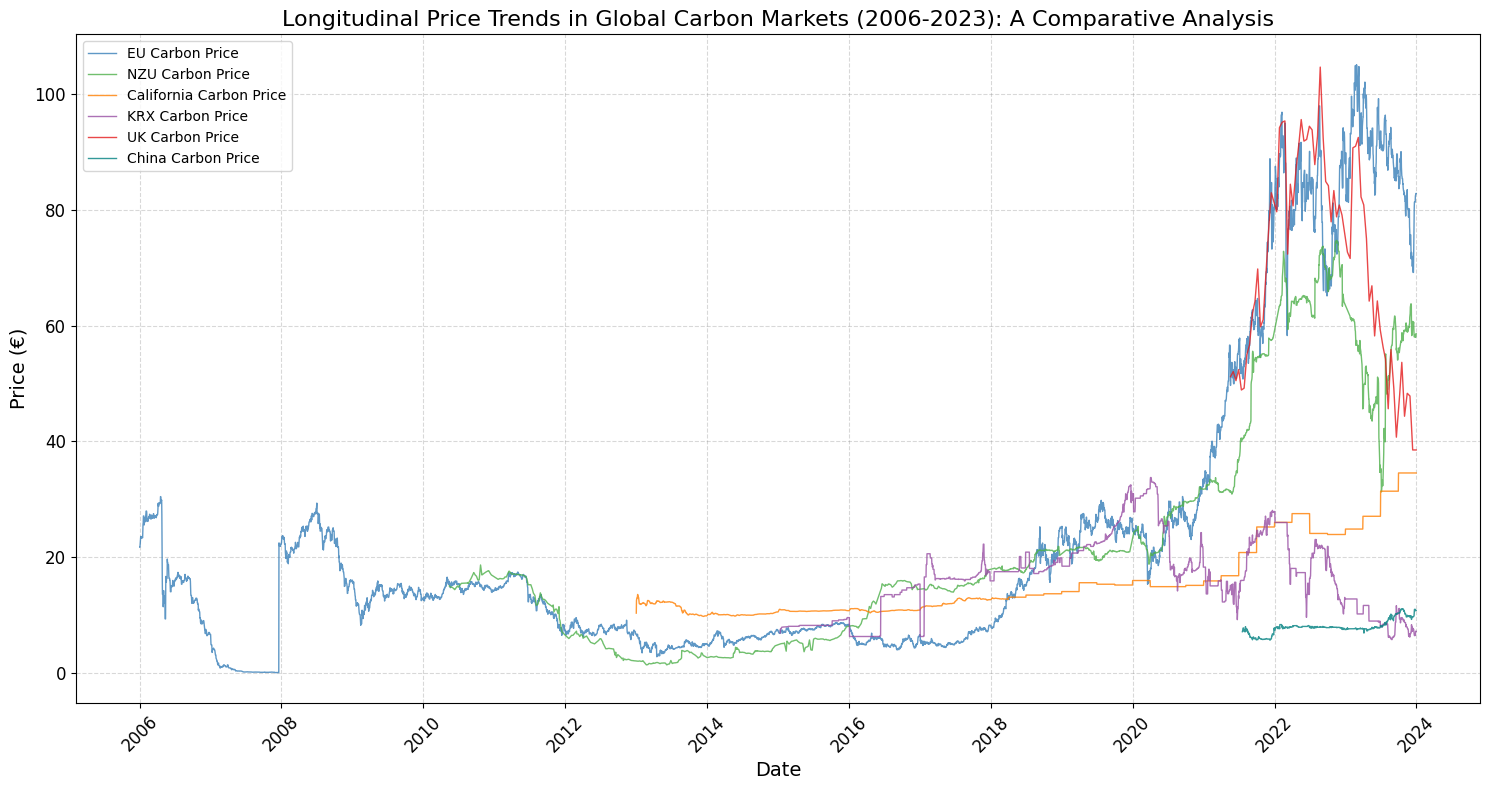

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define a new color palette
colors = {
    'EU': '#377eb8',        # Soft blue
    'NZU': '#4daf4a',       # Soft green
    'California': '#ff7f00', # Soft orange
    'KRX': '#984ea3',       # Soft purple
    'UK': '#e41a1c',        # Soft red
    'China': '#008080'
}

# Load data
data_paths = {
    'EU': '/content/drive/MyDrive/Thesis Dataset/Carbon Price/EU ETS_200601-202312_EUR_Filled.csv',
    'NZU': '/content/drive/MyDrive/Thesis Dataset/Carbon Price/NZ ETS_201005-202312_EUR_Filled.csv',
    'California': '/content/drive/MyDrive/Thesis Dataset/Carbon Price/Cali ETS_201301-202312_EUR_Filled.csv',
    'KRX': '/content/drive/MyDrive/Thesis Dataset/Carbon Price/KRX ETS_201501-202312_EUR_Filled.csv',
    'UK': '/content/drive/MyDrive/Thesis Dataset/Carbon Price/UK ETS_202105-202312_EUR_Filled.csv',
    'China': '/content/drive/MyDrive/Thesis Dataset/Carbon Price/China ETS_202107-202312_EUR_Filled.csv'
}
data = {}
for market, path in data_paths.items():
    data[market] = pd.read_csv(path)
    data[market]['Date'] = pd.to_datetime(data[market]['Date'])

# Plotting
plt.figure(figsize=(15, 8), facecolor='white')  # Set background color to white
for market, df in data.items():
    plt.plot(df['Date'], df['Close (EUR)'], color=colors[market], label=f'{market} Carbon Price', linewidth=1.0, alpha=0.8)

# Title and labels
plt.title('Longitudinal Price Trends in Global Carbon Markets (2006-2023): A Comparative Analysis', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price (€)', fontsize=14)

# Styling
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.legend(loc='upper left')  # Move legend to upper left
plt.grid(True, linestyle='--', color='gray', alpha=0.3)
plt.tight_layout()  # Adjust layout
plt.show()


## Create Six Markets' Candlesticks

EU ETS

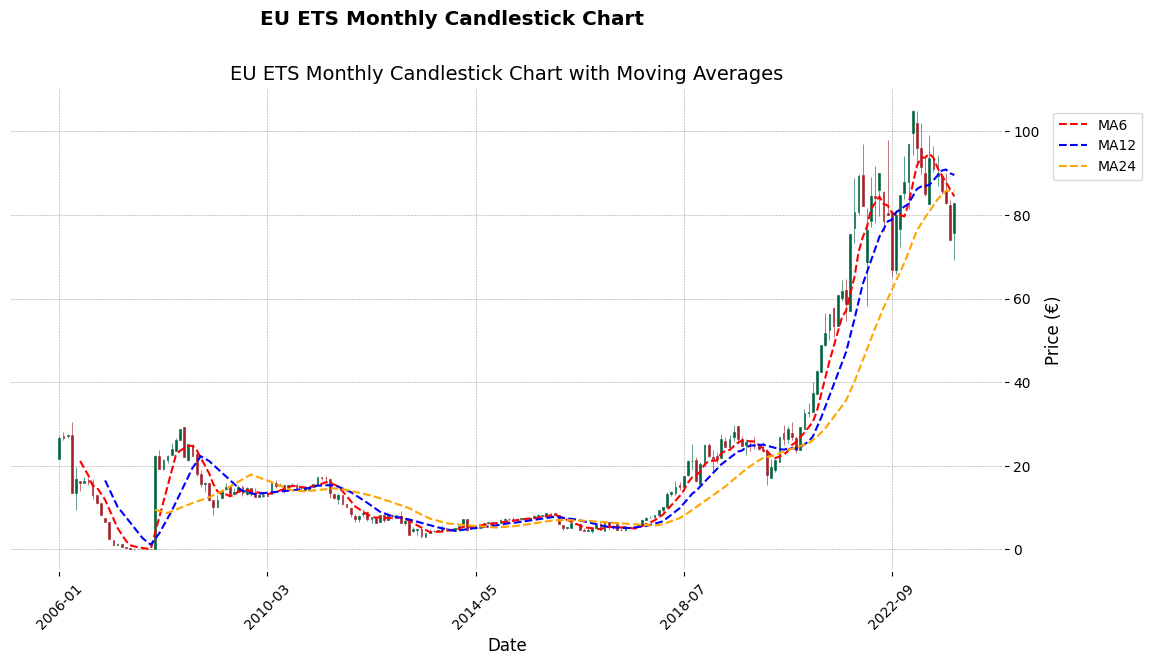

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf

def plot_candlestick_chart(market, data_source):
    # 從CSV文件加載數據到DataFrame。
    file_path = f'/content/drive/MyDrive/Thesis Dataset/Carbon Price/CandleStick/{market}_monthly_data.csv'
    try:
        market_data = pd.read_csv(file_path, parse_dates=['Date'])
    except FileNotFoundError:
        print(f"The file {file_path} was not found.")
        return
    except pd.errors.EmptyDataError:
        print("The file is empty.")
        return

    market_data.set_index('Date', inplace=True)
    market_data.index = pd.to_datetime(market_data.index)  # 確保索引是日期時間格式

    # 篩選數據從市場開始日期開始。
    start_date = '2006-01-01'
    market_data = market_data.loc[start_date:]

    # 計算移動平均線。
    ma_periods = [6, 12, 24]
    colors = ['red', 'blue', 'orange']
    addplot = []
    for period, color in zip(ma_periods, colors):
        market_data[f'MA{period}'] = market_data['Close'].rolling(window=period).mean()
        addplot.append(mpf.make_addplot(market_data[f'MA{period}'], color=color, linestyle='dashed', width=1.5, label=f'MA{period}'))

    # 生成K線圖。
    fig, axes = mpf.plot(market_data, type='candle', style='charles', volume=False, datetime_format='%Y-%m',
                         addplot=addplot, title=f'{market} ETS Monthly Candlestick Chart', ylabel='Price (€)',
                         returnfig=True, figscale=1.2, figratio=(12,6))

    # 直接調整y軸標籤樣式
    axes[0].yaxis.label.set_fontweight('normal')
    axes[0].set_title(f'{market} ETS Monthly Candlestick Chart with Moving Averages', fontsize=14, fontweight='normal', ha='center')

    # 將標籤手動添加到右側
    legend = axes[0].legend(loc='center left', bbox_to_anchor=(1.05, 0.88), borderaxespad=0.)

    # 設置x軸標籤
    axes[0].set_xlabel('Date', fontsize=12, fontweight='normal')

    # 手動調整邊距以移除數據源註釋。
    fig.subplots_adjust(left=0.1, right=0.85, top=0.93, bottom=0.2)  # 調整左、右、上和下邊距

    plt.show()

if __name__ == '__main__':
    market = 'EU'
    data_source = 'Your Data Source'
    plot_candlestick_chart(market, data_source)

California ETS

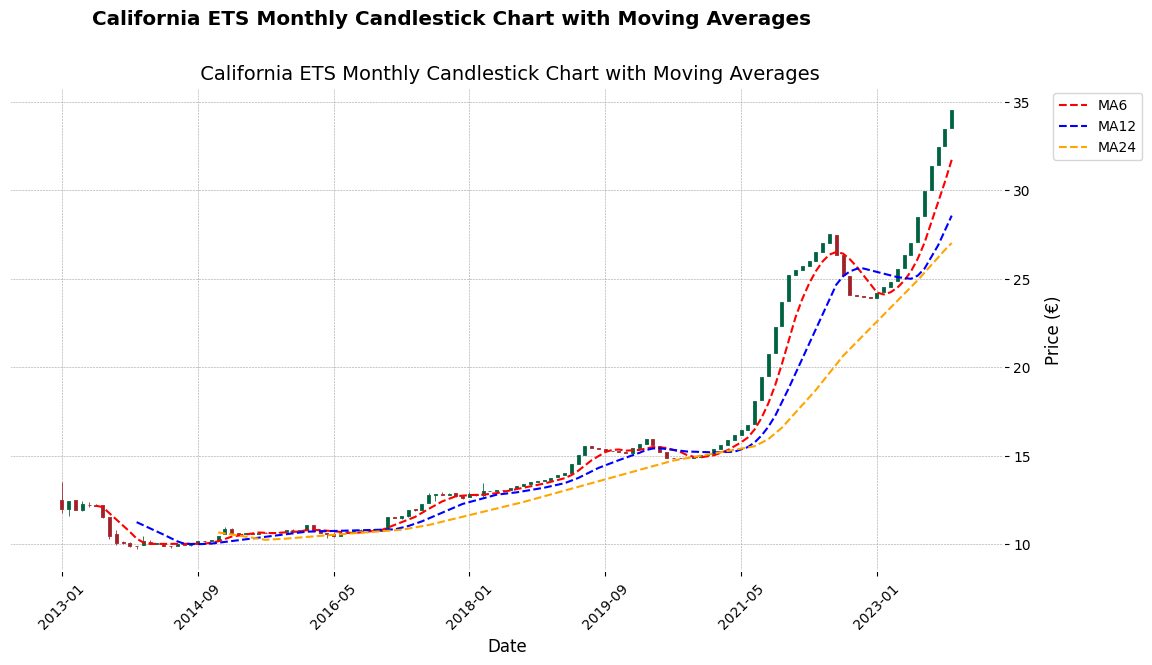

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf

def plot_california_chart():
    file_path = '/content/drive/MyDrive/Thesis Dataset/Carbon Price/CandleStick/California/California_CandleStick_Final.csv'
    market_data = pd.read_csv(file_path, parse_dates=['Date'])
    market_data.set_index('Date', inplace=True)

    market_data.index = pd.to_datetime(market_data.index)

    # 統一時間範圍
    start_date = '2013-01-01'
    market_data = market_data.loc[start_date:]

    # 計算移動平均線
    market_data['MA6'] = market_data['Close'].rolling(window=6).mean()
    market_data['MA12'] = market_data['Close'].rolling(window=12).mean()
    market_data['MA24'] = market_data['Close'].rolling(window=24).mean()

    # 設置移動平均線
    ma_periods = [6, 12, 24]
    colors = ['red', 'blue', 'orange']
    addplot = []
    for period, color in zip(ma_periods, colors):
        addplot.append(mpf.make_addplot(market_data[f'MA{period}'], color=color, linestyle='dashed', width=1.5, label=f'MA{period}'))

    # 生成K線圖
    fig, axes = mpf.plot(market_data, type='candle', style='charles', volume=False, datetime_format='%Y-%m',
                         addplot=addplot, title='California ETS Monthly Candlestick Chart with Moving Averages',
                         ylabel='', returnfig=True, figscale=1.2, figratio=(12,6))

    # 直接調整y軸標籤樣式
    axes[0].yaxis.label.set_fontweight('normal')
    axes[0].set_title(f' California ETS Monthly Candlestick Chart with Moving Averages', fontsize=14, fontweight='normal', ha='center')

    # 直接調整y軸標籤樣式
    axes[0].yaxis.set_label_position("right")
    axes[0].yaxis.tick_right()
    axes[0].set_ylabel('Price (€)', fontsize=12, labelpad=10)  # 調整labelpad參數以改變距離

    # 設置圖例位置
    legend = axes[0].legend(loc='center left', bbox_to_anchor=(1.05, 0.92), borderaxespad=0.)

    # 設置x軸標籤
    axes[0].set_xlabel('Date', fontsize=12, fontweight='normal')

    # 手動調整邊距以移除數據源註釋
    fig.subplots_adjust(left=0.1, right=0.85, top=0.93, bottom=0.2)

    plt.show()

if __name__ == '__main__':
    plot_california_chart()

China ETS

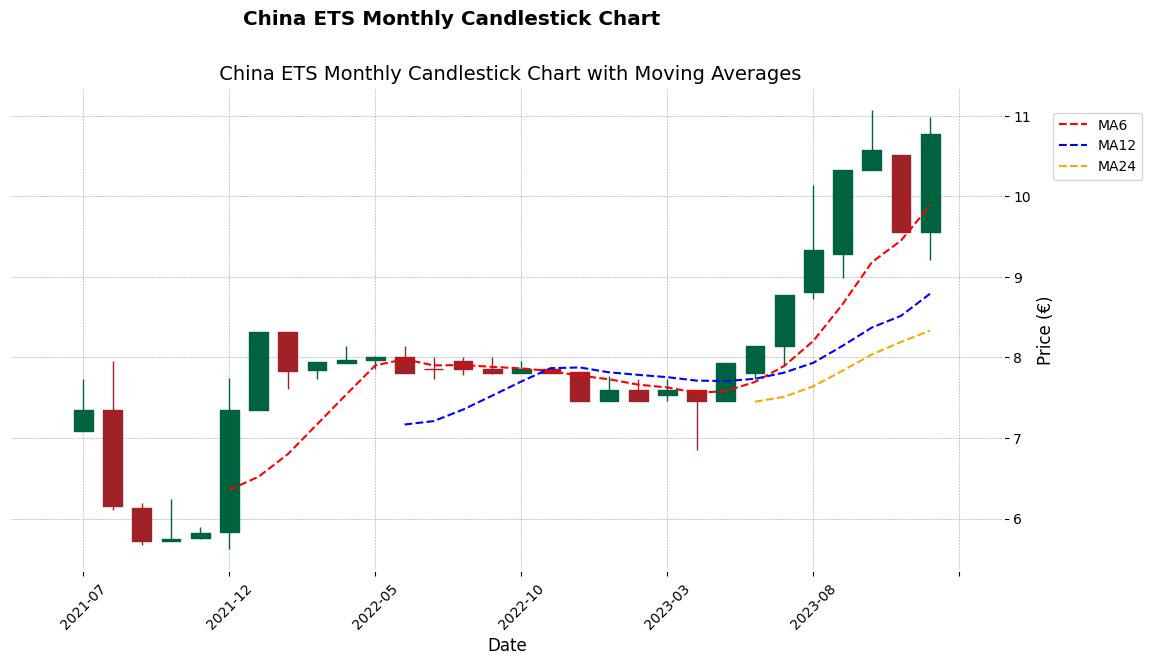

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf

def plot_candlestick_chart(market, data_source):
    # 從CSV文件加載數據到DataFrame。
    file_path = f'/content/drive/MyDrive/Thesis Dataset/Carbon Price/CandleStick/{market}_monthly_data.csv'
    try:
        market_data = pd.read_csv(file_path, parse_dates=['Date'])
    except FileNotFoundError:
        print(f"The file {file_path} was not found.")
        return
    except pd.errors.EmptyDataError:
        print("The file is empty.")
        return

    market_data.set_index('Date', inplace=True)
    market_data.index = pd.to_datetime(market_data.index)  # 確保索引是日期時間格式

    # 篩選數據從市場開始日期開始。
    start_date = '2021-07-19'
    market_data = market_data.loc[start_date:]

    # 計算移動平均線。
    ma_periods = [6, 12, 24]
    colors = ['red', 'blue', 'orange']
    addplot = []
    for period, color in zip(ma_periods, colors):
        market_data[f'MA{period}'] = market_data['Close'].rolling(window=period).mean()
        addplot.append(mpf.make_addplot(market_data[f'MA{period}'], color=color, linestyle='dashed', width=1.5, label=f'MA{period}'))

    # 生成K線圖。
    fig, axes = mpf.plot(market_data, type='candle', style='charles', volume=False, datetime_format='%Y-%m',
                         addplot=addplot, title=f'{market} ETS Monthly Candlestick Chart', ylabel='Price (€)',
                         returnfig=True, figscale=1.2, figratio=(12,6))

    # 直接調整y軸標籤樣式
    axes[0].yaxis.label.set_fontweight('normal')
    axes[0].set_title(f' {market} ETS Monthly Candlestick Chart with Moving Averages', fontsize=14, fontweight='normal', ha='center')

    # 將標籤手動添加到右側
    legend = axes[0].legend(loc='center left', bbox_to_anchor=(1.05, 0.88), borderaxespad=0.)

    # 設置x軸標籤
    axes[0].set_xlabel('Date', fontsize=12, fontweight='normal')

    # 手動調整邊距以移除數據源註釋。
    fig.subplots_adjust(left=0.1, right=0.85, top=0.93, bottom=0.2)  # 調整左、右、上和下邊距

    plt.show()

if __name__ == '__main__':
    market = 'China'
    data_source = 'Your Data Source'
    plot_candlestick_chart(market, data_source)

UK

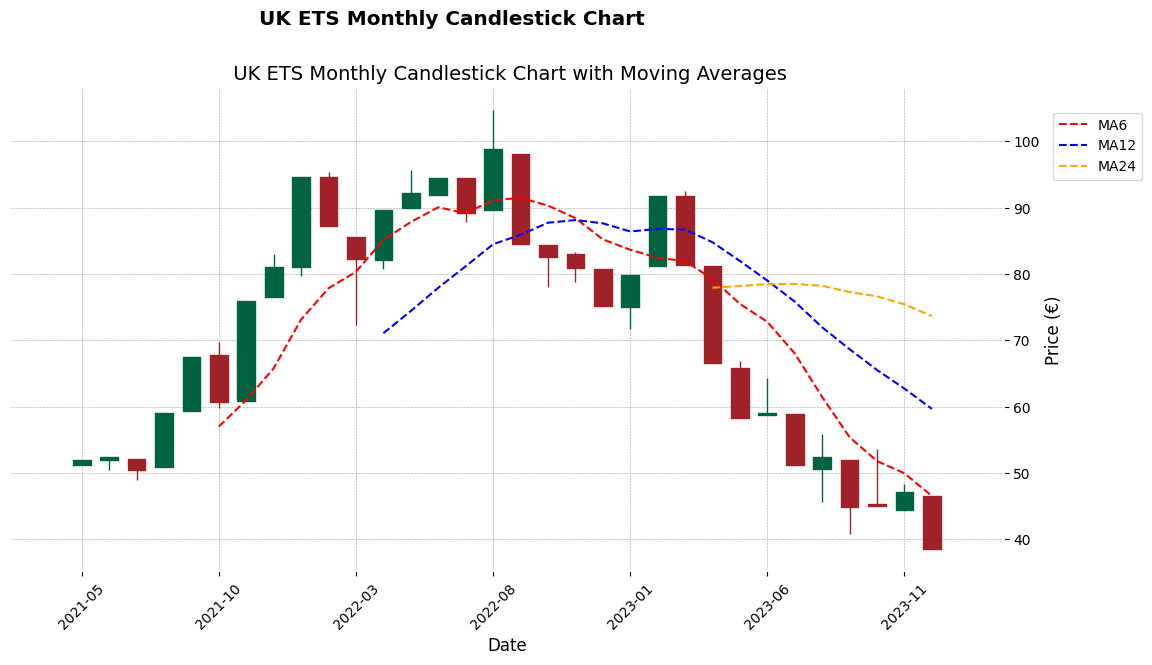

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf

def plot_candlestick_chart(market, data_source):
    # 從CSV文件加載數據到DataFrame。
    file_path = f'/content/drive/MyDrive/Thesis Dataset/Carbon Price/CandleStick/{market}_monthly_data.csv'
    try:
        market_data = pd.read_csv(file_path, parse_dates=['Date'])
    except FileNotFoundError:
        print(f"The file {file_path} was not found.")
        return
    except pd.errors.EmptyDataError:
        print("The file is empty.")
        return

    market_data.set_index('Date', inplace=True)
    market_data.index = pd.to_datetime(market_data.index)  # 確保索引是日期時間格式

    # 篩選數據從市場開始日期開始。
    start_date = '2021-05-19'
    market_data = market_data.loc[start_date:]

    # 計算移動平均線。
    ma_periods = [6, 12, 24]
    colors = ['red', 'blue', 'orange']
    addplot = []
    for period, color in zip(ma_periods, colors):
        market_data[f'MA{period}'] = market_data['Close'].rolling(window=period).mean()
        addplot.append(mpf.make_addplot(market_data[f'MA{period}'], color=color, linestyle='dashed', width=1.5, label=f'MA{period}'))

    # 生成K線圖。
    fig, axes = mpf.plot(market_data, type='candle', style='charles', volume=False, datetime_format='%Y-%m',
                         addplot=addplot, title=f'{market} ETS Monthly Candlestick Chart', ylabel='Price (€)',
                         returnfig=True, figscale=1.2, figratio=(12,6))

    # 直接調整y軸標籤樣式
    axes[0].yaxis.label.set_fontweight('normal')
    axes[0].set_title(f' {market} ETS Monthly Candlestick Chart with Moving Averages', fontsize=14, fontweight='normal', ha='center')

    # 將標籤手動添加到右側
    legend = axes[0].legend(loc='center left', bbox_to_anchor=(1.05, 0.88), borderaxespad=0.)

    # 設置x軸標籤
    axes[0].set_xlabel('Date', fontsize=12, fontweight='normal')

    # 手動調整邊距以移除數據源註釋。
    fig.subplots_adjust(left=0.1, right=0.85, top=0.93, bottom=0.2)  # 調整左、右、上和下邊距

    plt.show()

if __name__ == '__main__':
    market = 'UK'
    data_source = 'Your Data Source'
    plot_candlestick_chart(market, data_source)

NZ ETS

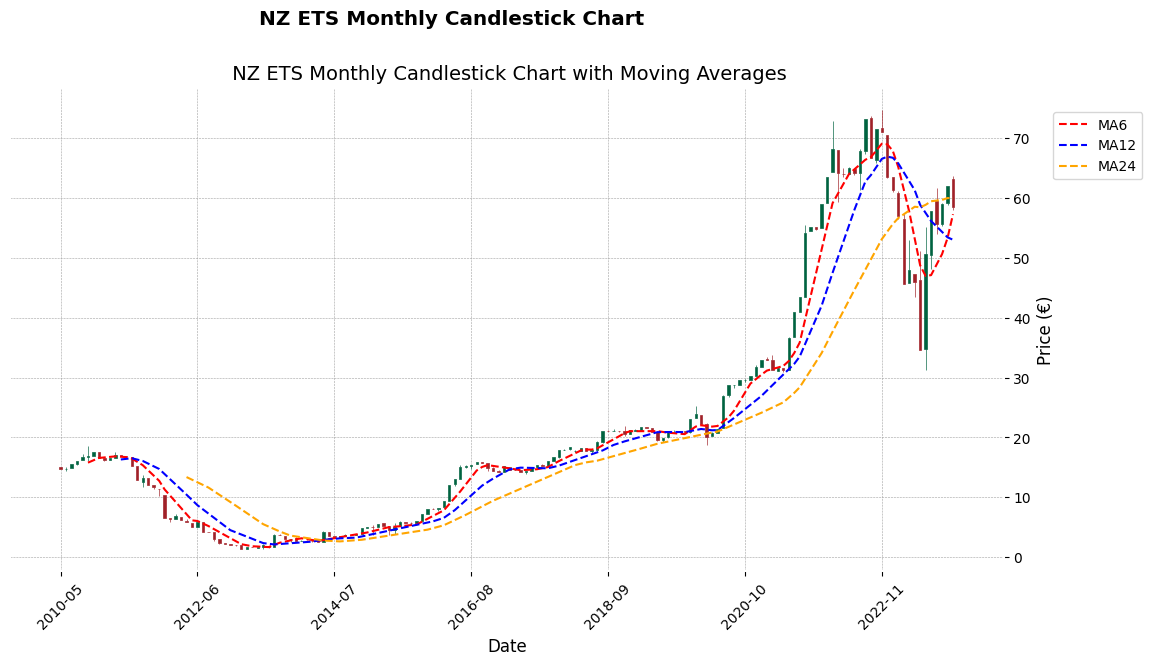

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf

def plot_candlestick_chart(market, data_source):
    # 從CSV文件加載數據到DataFrame。
    file_path = f'/content/drive/MyDrive/Thesis Dataset/Carbon Price/CandleStick/{market}_monthly_data.csv'
    try:
        market_data = pd.read_csv(file_path, parse_dates=['Date'])
    except FileNotFoundError:
        print(f"The file {file_path} was not found.")
        return
    except pd.errors.EmptyDataError:
        print("The file is empty.")
        return

    market_data.set_index('Date', inplace=True)
    market_data.index = pd.to_datetime(market_data.index)  # 確保索引是日期時間格式

    # 篩選數據從市場開始日期開始。
    start_date = '2010-05-14'
    market_data = market_data.loc[start_date:]

    # 計算移動平均線。
    market_data['MA6'] = market_data['Close'].rolling(window=6).mean()
    market_data['MA12'] = market_data['Close'].rolling(window=12).mean()
    market_data['MA24'] = market_data['Close'].rolling(window=24).mean()

    # 設置移動平均線
    ma_periods = [6, 12, 24]
    colors = ['red', 'blue', 'orange']
    addplot = []
    for period, color in zip(ma_periods, colors):
        addplot.append(mpf.make_addplot(market_data[f'MA{period}'], color=color, linestyle='dashed', width=1.5, label=f'MA{period}'))

    # 生成K線圖。
    fig, axes = mpf.plot(market_data, type='candle', style='charles', volume=False, datetime_format='%Y-%m',
                         addplot=addplot, title=f'{market} ETS Monthly Candlestick Chart', ylabel='Price (€)',
                         returnfig=True, figscale=1.2, figratio=(12,6))

    # 直接調整y軸標籤樣式
    axes[0].yaxis.label.set_fontweight('normal')
    axes[0].set_title(f' {market} ETS Monthly Candlestick Chart with Moving Averages', fontsize=14, fontweight='normal', ha='center')

    # 將標籤手動添加到右側
    legend = axes[0].legend(loc='center left', bbox_to_anchor=(1.05, 0.88), borderaxespad=0.)

    # 設置x軸標籤
    axes[0].set_xlabel('Date', fontsize=12, fontweight='normal')

    # 手動調整邊距以移除數據源註釋。
    fig.subplots_adjust(left=0.1, right=0.85, top=0.93, bottom=0.2)  # 調整左、右、上和下邊距

    plt.show()

if __name__ == '__main__':
    market = 'NZ'
    data_source = 'Your Data Source'
    plot_candlestick_chart(market, data_source)

KRX ETS

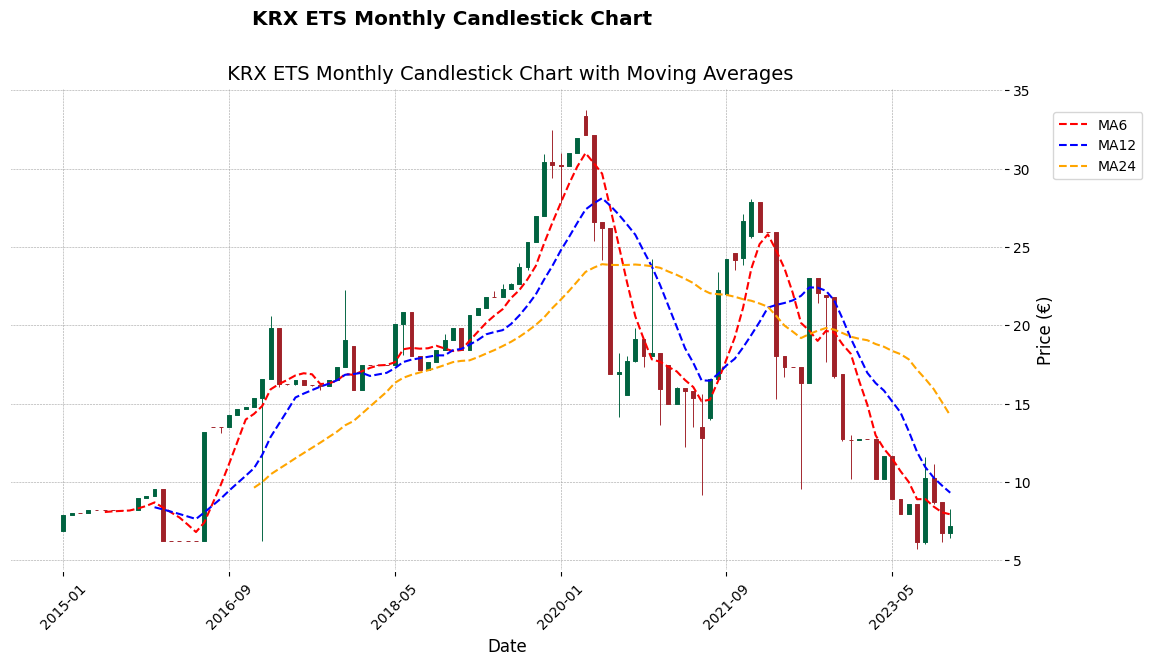

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf

def plot_candlestick_chart(market, data_source):
    # 從CSV文件加載數據到DataFrame。
    file_path = f'/content/drive/MyDrive/Thesis Dataset/Carbon Price/CandleStick/{market}_monthly_data.csv'
    try:
        market_data = pd.read_csv(file_path, parse_dates=['Date'])
    except FileNotFoundError:
        print(f"The file {file_path} was not found.")
        return
    except pd.errors.EmptyDataError:
        print("The file is empty.")
        return

    market_data.set_index('Date', inplace=True)
    market_data.index = pd.to_datetime(market_data.index)  # 確保索引是日期時間格式

    # 篩選數據從市場開始日期開始。
    start_date = '2015-01-14'
    market_data = market_data.loc[start_date:]

    # 計算移動平均線。
    market_data['MA6'] = market_data['Close'].rolling(window=6).mean()
    market_data['MA12'] = market_data['Close'].rolling(window=12).mean()
    market_data['MA24'] = market_data['Close'].rolling(window=24).mean()

    # 設置移動平均線
    ma_periods = [6, 12, 24]
    colors = ['red', 'blue', 'orange']
    addplot = []
    for period, color in zip(ma_periods, colors):
        addplot.append(mpf.make_addplot(market_data[f'MA{period}'], color=color, linestyle='dashed', width=1.5, label=f'MA{period}'))

    # 生成K線圖。
    fig, axes = mpf.plot(market_data, type='candle', style='charles', volume=False, datetime_format='%Y-%m',
                         addplot=addplot, title=f'{market} ETS Monthly Candlestick Chart', ylabel='Price (€)',
                         returnfig=True, figscale=1.2, figratio=(12,6))

    # 直接調整y軸標籤樣式
    axes[0].yaxis.label.set_fontweight('normal')
    axes[0].set_title(f' {market} ETS Monthly Candlestick Chart with Moving Averages', fontsize=14, fontweight='normal', ha='center')

    # 將標籤手動添加到右側
    legend = axes[0].legend(loc='center left', bbox_to_anchor=(1.05, 0.88), borderaxespad=0.)

    # 設置x軸標籤
    axes[0].set_xlabel('Date', fontsize=12, fontweight='normal')

    # 手動調整邊距以移除數據源註釋。
    fig.subplots_adjust(left=0.1, right=0.85, top=0.93, bottom=0.2)  # 調整左、右、上和下邊距

    plt.show()

if __name__ == '__main__':
    market = 'KRX'
    data_source = 'Your Data Source'
    plot_candlestick_chart(market, data_source)

## Normalized Month Candlestick

Calculate every month's OHLC

In [ ]:
import pandas as pd

file_path = '/content/drive/MyDrive/Thesis Dataset/Re-experiment/6 ETS_2006-2023_Weighted_0-100_Normalized.csv'
ets_data = pd.read_csv(file_path)

ets_data['Date'] = pd.to_datetime(ets_data['Date'], format='%Y/%m/%d')

ets_data.set_index('Date', inplace=True)

ets_data = ets_data[['SixMarket_Normalization']]

monthly_ets_data = ets_data.resample('M').agg({
    'SixMarket_Normalization': ['first', 'max', 'min', 'last']
})

monthly_ets_data.columns = ['Open', 'High', 'Low', 'Close']

monthly_ets_data = monthly_ets_data.round(2)

output_file_path = '/content/drive/MyDrive/Thesis Dataset/Re-experiment/6 ETS_monthly_0-100_OHLC.csv'
monthly_ets_data.to_csv(output_file_path)

print(f"文件已保存到: {output_file_path}")

print(monthly_ets_data.head())

文件已保存到: /content/drive/MyDrive/Thesis Dataset/Re-experiment/6 ETS_monthly_0-100_OHLC.csv
             Open   High    Low  Close
Date                                  
2006-01-31  13.63  17.04  13.63  16.78
2006-02-28  17.07  17.56  16.43  16.69
2006-03-31  16.98  17.29  16.78  17.16
2006-04-30  17.16  19.14   8.52   8.52
2006-05-31   8.52  12.36   5.84  10.50


## Create Daily Carbon Market Index Trend Analysis

<ipython-input-2-33e4fe2c2b2c>:18: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


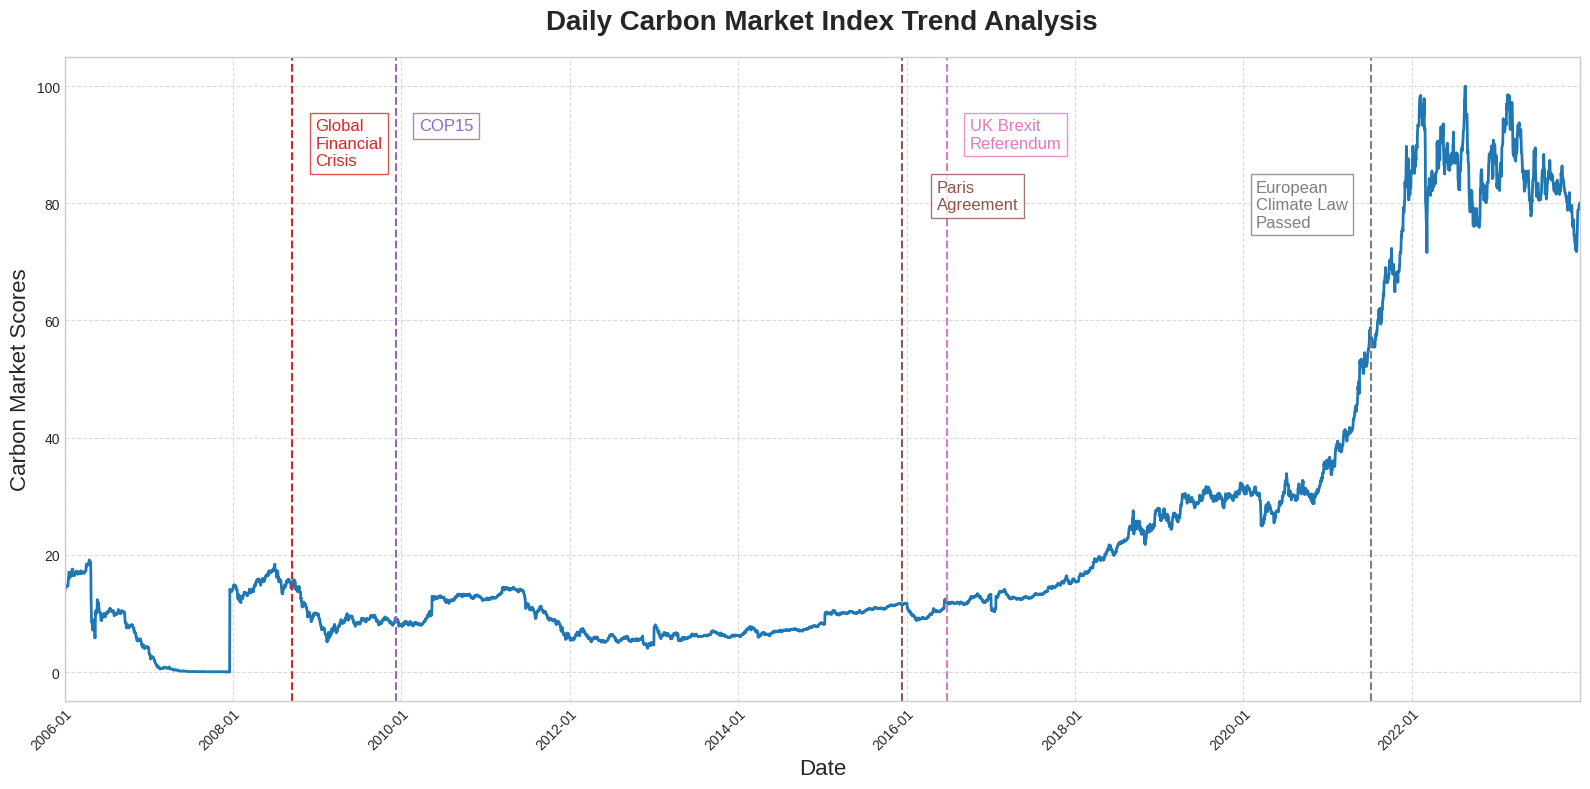

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

# Read CSV file
file_path = '/content/drive/MyDrive/Thesis Dataset/CMSI_vFinal_testing/6 ETS_2006-2023_Normalization_0~100.csv'
data = pd.read_csv(file_path)

# Ensure the Date column is of datetime type for plotting
data['Date'] = pd.to_datetime(data['Date'])

# Set font to a more universally available font
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['axes.unicode_minus'] = False

# Set plot size and style
plt.figure(figsize=(16, 8))
plt.style.use('seaborn-whitegrid')

# Add subplot
ax = plt.subplot()

# Plot the trend, showing only the Gaussian smoothed data
ax.plot(data['Date'], data['SixMarket_Normalization'], linewidth=2, label='Gaussian Smoothed Trend', color='#1f77b4')

# Set title and axis labels
ax.set_title('Daily Carbon Market Index Trend Analysis', fontsize=20, fontweight='bold', pad=20)
ax.set_xlabel('Date', fontsize=16)
ax.set_ylabel('Carbon Market Scores', fontsize=16)

# Set x-axis date format
date_format = DateFormatter("%Y-%m")
ax.xaxis.set_major_formatter(date_format)

# Show a longer date range, such as 2006-2023
ax.set_xlim(pd.Timestamp('2006-01-01'), pd.Timestamp('2023-12-31'))

# Automatically adjust the angle of x-axis date labels
plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')

# Set background grid
ax.grid(linestyle='--', alpha=0.7)

# Add event annotations with vertical text
events = [
    ('2008-09-14', 'Global\nFinancial\nCrisis', '#d62728'),
    ('2009-12-07', 'COP15', '#9467bd'),
    ('2015-12-12', 'Paris\nAgreement', '#8c564b'),
    ('2016-06-23', 'UK Brexit\nReferendum', '#e377c2'),
    ('2021-07-09', 'European\nClimate Law\nPassed', '#7f7f7f')
]

for date, label, color in events:
    event_date = pd.Timestamp(date)
    ax.axvline(x=event_date, color=color, linestyle='--', linewidth=1.5)
    # Adjust the position of the text to avoid overlap
    if label == 'European\nClimate Law\nPassed':
        ax.text(x=event_date - pd.Timedelta(days=500), y=ax.get_ylim()[1]*0.8, s=label, fontsize=12, ha='left', va='top', color=color, bbox=dict(facecolor='white', alpha=0.8, edgecolor=color))
    elif label == 'Paris\nAgreement':
        ax.text(x=event_date + pd.Timedelta(days=150), y=ax.get_ylim()[1]*0.8, s=label, fontsize=12, ha='left', va='top', color=color, bbox=dict(facecolor='white', alpha=0.8, edgecolor=color))
    else:
        ax.text(x=event_date + pd.Timedelta(days=100), y=ax.get_ylim()[1]*0.9, s=label, fontsize=12, ha='left', va='top', color=color, bbox=dict(facecolor='white', alpha=0.8, edgecolor=color))

plt.tight_layout()
plt.show()